<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 17** | Árvores II
Caderno de **exercício 03**<br>

# Parte II : árvore de classificação

## Discente: Samuel Saturno

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

### Importando as Bibliotecas

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

### Carregando o banco de dados

In [3]:
%%time

_features = '/content/features.txt'
_subject_train = '/content/subject_train.txt'
_X_train = '/content/X_train.txt'
_subject_test = '/content/subject_test.txt'
_X_test = '/content/X_test.txt'
_y_train = '/content/y_train.txt'
_y_test = '/content/y_test.txt'

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [4]:
%%time

# Carrega o arquivo CSV utilizando a biblioteca pandas
features = (pd.read_csv(filepath_or_buffer=_features, #  Especifica o caminho do arquivo CSV
                        sep=';', # Define o separador utilizado no arquivo CSV como (;)
                        header=None)# Indica que o CSV não possui uma linha de cabeçalho
              .squeeze('columns'))# o Método 'squeeze' transforma o Dataframe em uma série

# Exibi a série
#features

CPU times: user 9.11 ms, sys: 0 ns, total: 9.11 ms
Wall time: 15.4 ms


In [5]:
%%time

# Carrega o arquivo CSV utilizando a biblioteca pandas
subject_train = (pd.read_csv(filepath_or_buffer=_subject_train, #  Especifica o caminho do arquivo CSV
                             header=None) # Indica que o CSV não possui uma linha de cabeçalho
                   .squeeze('columns')) # o Método 'squeeze' transforma o Dataframe em uma série

# Exibi a série
#subject_train

CPU times: user 5.64 ms, sys: 0 ns, total: 5.64 ms
Wall time: 5.63 ms


In [6]:
%%time

# Carrega um arquivo CSV para os dados de treinamento (X_train) usando a biblioteca pandas
# O arquivo é lido a partir do caminho especificado pela variável _X_train
# Não há uma linha de cabeçalho no arquivo, então o parâmetro header=None é usado
# O parâmetro names=features indica que o DataFrame resultante deve ter colunas nomeadas conforme os valores em 'features'
# O parâmetro delim_whitespace=True é usado para indicar que os valores no arquivo são separados por espaços em branco

X_train = (pd.read_csv(filepath_or_buffer=_X_train,
                       header=None,
                       names=features,
                       delim_whitespace=True)
             .assign(subject_train=subject_train))  # Adiciona a coluna 'subject_train' ao DataFrame

# Define a coluna 'subject_train' como o índice do DataFrame X_train
# O parâmetro drop=True indica que a coluna utilizada como índice deve ser removida do DataFrame
# O parâmetro append=True indica que o índice 'subject_train' deve ser adicionado como nível adicional ao índice existente
# O parâmetro inplace=True indica que a operação deve ser realizada diretamente no DataFrame X_train

X_train.set_index(keys='subject_train',
                  drop=True,
                  append=True,
                  inplace=True)

# Exibe o DataFrame X_train
X_train

CPU times: user 1.45 s, sys: 108 ms, total: 1.56 s
Wall time: 1.59 s


,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [7]:
%%time

# Carrega o arquivo CSV utilizando a biblioteca pandas
y_train = (pd.read_csv(filepath_or_buffer=_y_train, #  Especifica o caminho do arquivo CSV
                             header=None) # Indica que o CSV não possui uma linha de cabeçalho
                   .squeeze('columns')) # o Método 'squeeze' transforma o Dataframe em uma série

# Exibi a série
y_train

CPU times: user 6.76 ms, sys: 0 ns, total: 6.76 ms
Wall time: 24 ms


0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

In [8]:
%%time

# Carrega um arquivo CSV para os IDs de sujeitos dos dados de teste (subject_test) usando a biblioteca pandas
# O arquivo é lido a partir do caminho especificado pela variável _subject_test
# Não há uma linha de cabeçalho no arquivo, então o parâmetro header=None é usado
# A função squeeze é usada para transformar o DataFrame resultante em uma série
subject_test = (pd.read_csv(filepath_or_buffer=_subject_test,
                            header=None)
                   .squeeze('columns'))

# Carrega um arquivo CSV para os dados de teste (X_test) usando a biblioteca pandas
# O arquivo é lido a partir do caminho especificado pela variável _X_test
# Não há uma linha de cabeçalho no arquivo, então o parâmetro header=None é usado
# O parâmetro names=features indica que o DataFrame resultante deve ter colunas nomeadas conforme os valores em 'features'
# O parâmetro delim_whitespace=True é usado para indicar que os valores no arquivo são separados por espaços em branco
# A função assign é usada para adicionar a coluna 'subject_test' ao DataFrame
X_test = (pd.read_csv(filepath_or_buffer=_X_test,
                      header=None,
                      names=features,
                      delim_whitespace=True)
             .assign(subject_test=subject_test))

# Define a coluna 'subject_test' como o índice do DataFrame X_test
# O parâmetro drop=True indica que a coluna utilizada como índice deve ser removida do DataFrame
# O parâmetro append=True indica que o índice 'subject_test' deve ser adicionado como nível adicional ao índice existente
# O parâmetro inplace=True indica que a operação deve ser realizada diretamente no DataFrame X_test
X_test.set_index(keys='subject_test',
                 drop=True,
                 append=True,
                 inplace=True)

# Exibe o DataFrame X_test
X_test

CPU times: user 534 ms, sys: 27.2 ms, total: 562 ms
Wall time: 565 ms


,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [9]:
%%time

# Carrega o arquivo CSV utilizando a biblioteca pandas
y_test = (pd.read_csv(filepath_or_buffer=_y_test, #  Especifica o caminho do arquivo CSV
                             header=None) # Indica que o CSV não possui uma linha de cabeçalho
                   .squeeze('columns')) # o Método 'squeeze' transforma o Dataframe em uma série

# Exibi a série
y_test

CPU times: user 3.34 ms, sys: 1.09 ms, total: 4.43 ms
Wall time: 4.43 ms


0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [13]:
%%time

# Definição das colunas que serão utilizadas no treinamento e teste
cols = ['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '42 tGravityAcc-mean()-Y']

# Seleção das colunas específicas dos dados de treinamento e teste
X_train = X_train[cols]
X_test  = X_test [cols]

# Impressão das formas dos conjuntos de treinamento e teste
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

# Inicialização do classificador de árvore de decisão com hiperparâmetros específicos
clf = DecisionTreeClassifier(min_samples_leaf=20,
                             random_state=42)

# Cálculo do caminho de poda de complexidade de custo para a árvore de decisão
path = clf.cost_complexity_pruning_path(X=X_train,
                                        y=y_train)

# Extração dos valores de alfa e impurezas do caminho de poda
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Filtragem e seleção de valores de alfa únicos maiores ou iguais a zero
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

# Impressão da quantidade de valores de alfa selecionados
print('Quantidade de ccp_alphas:', ccp_alphas.size)



X_train: (7352, 3)
y_train: (7352,)
X_test: (2947, 3)
y_test: (2947,)
Quantidade de ccp_alphas: 108
CPU times: user 29.7 ms, sys: 595 µs, total: 30.3 ms
Wall time: 31.8 ms


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [14]:
%%time

# Criar um classificador de árvore de decisão com um estado aleatório definido como 42
clf = DecisionTreeClassifier(random_state=42)

# Definir os parâmetros do alpha de CCP para a busca de hiperparâmetros
grid_parametros = {'ccp_alpha': ccp_alphas[::10]}

# Configurar a busca em grade com validação cruzada
grid = GridSearchCV(estimator=clf,
                    param_grid=grid_parametros,
                    cv=10,
                    verbose=1)

# Ajustar o modelo usando a busca em grade e os dados de treinamento
grid.fit(X_train, y_train)

# Armazenar os resultados da busca em grade em um DataFrame
resultados = pd.DataFrame(grid.cv_results_)

# Ordenar os resultados pelo escore de teste
resultados.sort_values(by='rank_test_score')



Fitting 10 folds for each of 11 candidates, totalling 110 fits
CPU times: user 3.19 s, sys: 0 ns, total: 3.19 s
Wall time: 3.2 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
10,0.026686,0.002075,0.002658,0.000488,0.007083,{'ccp_alpha': 0.007082924052720332},0.792120,0.808424,0.873469,0.771429,0.798639,0.790476,0.838095,0.779592,0.863946,0.722449,0.803864,0.042733,1
9,0.025812,0.000865,0.002499,0.000080,0.002034,{'ccp_alpha': 0.0020342316461378998},0.802989,0.736413,0.850340,0.765986,0.742857,0.783673,0.831293,0.737415,0.831293,0.737415,0.781967,0.042209,2
8,0.025614,0.000724,0.002532,0.000109,0.00112,{'ccp_alpha': 0.001120493079864795},0.764946,0.711957,0.838095,0.764626,0.748299,0.768707,0.814966,0.715646,0.838095,0.791837,0.775717,0.042774,3
5,0.025777,0.000873,0.002743,0.000658,0.000317,{'ccp_alpha': 0.000316912071380578},0.730978,0.736413,0.814966,0.714286,0.761905,0.749660,0.783673,0.795918,0.832653,0.790476,0.771093,0.036671,4
4,0.025152,0.000622,0.002581,0.000122,0.000206,{'ccp_alpha': 0.00020584175583017689},0.774457,0.743207,0.824490,0.700680,0.746939,0.730612,0.775510,0.791837,0.819048,0.789116,0.769589,0.037245,5
6,0.026203,0.002467,0.002774,0.000717,0.000432,{'ccp_alpha': 0.0004324280328325261},0.737772,0.724185,0.802721,0.715646,0.764626,0.748299,0.772789,0.793197,0.844898,0.783673,0.768781,0.037403,6
0,0.024952,0.001204,0.002802,0.000149,0.0,{'ccp_alpha': 0.0},0.775815,0.729620,0.843537,0.689796,0.741497,0.721088,0.760544,0.800000,0.806803,0.772789,0.764149,0.043265,7
1,0.024659,0.000737,0.002757,0.000378,0.00002,{'ccp_alpha': 2.040261153427622e-05},0.775815,0.729620,0.843537,0.689796,0.741497,0.721088,0.760544,0.800000,0.806803,0.772789,0.764149,0.043265,7
2,0.024929,0.000772,0.002769,0.000379,0.000059,{'ccp_alpha': 5.918425528606344e-05},0.775815,0.729620,0.843537,0.689796,0.741497,0.721088,0.760544,0.800000,0.806803,0.772789,0.764149,0.043265,7
3,0.025387,0.001925,0.003170,0.000793,0.000097,{'ccp_alpha': 9.743287957185074e-05},0.775815,0.729620,0.843537,0.689796,0.741497,0.721088,0.760544,0.800000,0.806803,0.772789,0.764149,0.043265,7


In [15]:
# Obter o melhor valor de ccp_alpha dos resultados usando o índice do melhor modelo selecionado pela busca em grade
melhor_ccp = resultados.iloc[grid.best_index_]['param_ccp_alpha']

# Imprimir informações sobre o modelo vencedor
print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid.best_score_)  # Pontuação média de teste do melhor modelo
print('\t param_ccp_alpha:', melhor_ccp)  # Melhor valor de ccp_alpha encontrado



 rank_test_score vencedor:
	 mean_test_score: 0.8038638716356108
	 param_ccp_alpha: 0.007082924052720332


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Parâmetro                    Valor
ccp_alpha                 0.007083
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.7207329487614523


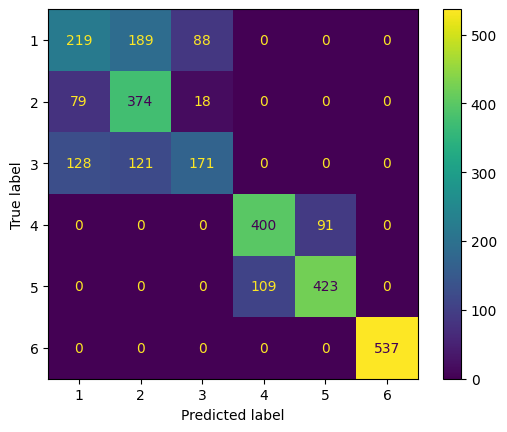

CPU times: user 412 ms, sys: 81.1 ms, total: 494 ms
Wall time: 462 ms


In [18]:
%%time

# Criar e ajustar um classificador de árvore de decisão com o melhor valor de ccp_alpha encontrado
clf = DecisionTreeClassifier(random_state=42,
                             ccp_alpha=melhor_ccp
                            ).fit(X_train, y_train)

# Imprimir os parâmetros do modelo
print(pd.DataFrame(data=clf.get_params(),
                   index=pd.Index(data=['Valor'],
                                  name='Parâmetro')
                  ).T,
      '\n')

# Imprimir a acurácia da árvore na base de testes
print('Acurácia da árvore na base de testes:',
      clf.score(X=X_test, y=y_test))

# Visualizar a matriz de confusão
ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                      X=X_test,
                                      y=y_test)
plt.show()


### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [19]:
%%time

# Calcular a matriz de confusão
matriz = confusion_matrix(y_true=y_test,
                          y_pred=clf.predict(X_test))

# Extrair a contagem de acertos e erros para cada classe
acertos = [matriz[x,x] for x in range(6)]
erros   = sum(matriz) - acertos

# Criar um DataFrame com os resultados
pd.DataFrame(data={'acertos':acertos,
                   'erros':erros},
             index=pd.Index(data=list(range(1,7)),
                            name='classe')
            ).sort_values(by='erros',
                          ascending=False)


CPU times: user 10.9 ms, sys: 877 µs, total: 11.8 ms
Wall time: 13.3 ms


,acertos,erros
classe,,
2,374,310
1,219,207
4,400,109
3,171,106
5,423,91
6,537,0


In [20]:
# Imprimir a contagem de valores únicos na série y_train, ordenados por índice
print(y_train.value_counts().sort_index())

# Criar uma nova série booleana indicando se cada entrada de y_train é igual a 2
y_train_2 = pd.Series(data=(y_train == 2),
                      name='classe_2')

# Imprimir a contagem de valores verdadeiros e falsos na nova série y_train_2
y_train_2.value_counts()


1    1226
2    1073
3     986
4    1286
5    1374
6    1407
Name: 0, dtype: int64


False    6279
True     1073
Name: classe_2, dtype: int64

In [25]:
%%time

# Criar e ajustar um classificador de árvore de decisão para a classe 2
clf_2 = DecisionTreeClassifier(min_samples_leaf=20,
                               max_depth=4,
                               random_state=42).fit(X= X_train,
                                                    y= y_train_2)

# Identificar as 3 melhores variáveis para a classe 2
melhores_classe2 = (pd.DataFrame(data={'var': X_train.columns,
                                       'feature_importances_': clf_2.feature_importances_})
                      .sort_values(by='feature_importances_',
                                   ascending=False))
cols_classe2 = melhores_classe2['var'].values[:3]

# Imprimir as 3 melhores variáveis para a classe 2
print('3 melhores variáveis:', cols_classe2, '\n')

# Atualizar as colunas de treinamento e teste com as variáveis selecionadas para a classe 2
cols_2 = cols + cols_classe2.tolist()
X_train = X_train[cols_2]
X_test = X_test[cols_2]

# Imprimir as colunas de X_train e X_test
print('X_train: \n', X_train.columns)
print('X_test: \n', X_test.columns)


3 melhores variáveis: ['42 tGravityAcc-mean()-Y' '390 fBodyAccJerk-bandsEnergy()-1,16'
 '53 tGravityAcc-min()-X'] 

X_train: 
 Index(['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '42 tGravityAcc-mean()-Y', '42 tGravityAcc-mean()-Y',
       '390 fBodyAccJerk-bandsEnergy()-1,16', '53 tGravityAcc-min()-X'],
      dtype='object')
X_test: 
 Index(['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '42 tGravityAcc-mean()-Y', '42 tGravityAcc-mean()-Y',
       '390 fBodyAccJerk-bandsEnergy()-1,16', '53 tGravityAcc-min()-X'],
      dtype='object')
CPU times: user 22.2 ms, sys: 0 ns, total: 22.2 ms
Wall time: 22.3 ms


In [26]:
%%time

# Criar um classificador de árvore de decisão com estado aleatório definido como 42
clf_2 = DecisionTreeClassifier(random_state=42)

# Calcular o caminho de poda por complexidade de custo
path_2 = clf_2.cost_complexity_pruning_path(X=X_train,
                                            y=y_train)
# Extrair os valores únicos de ccp_alpha após filtragem
ccp_alphas_2, impurities_2 = path_2.ccp_alphas, path_2.impurities
ccp_alphas_2 = np.unique(ccp_alphas_2[ccp_alphas_2 >= 0])

# Configurar uma busca de grade para encontrar o melhor ccp_alpha
clf_2 = DecisionTreeClassifier(random_state=42)
grid_2 = GridSearchCV(estimator=clf_2,
                      param_grid={'ccp_alpha': ccp_alphas_2[::10]},
                      cv=10,
                      verbose=1)
grid_2.fit(X_train, y_train)

# Armazenar os resultados da busca de grade em um DataFrame
resultados_2 = pd.DataFrame(grid_2.cv_results_)
resultados_2.sort_values(by='rank_test_score')


Fitting 10 folds for each of 27 candidates, totalling 270 fits
CPU times: user 16.5 s, sys: 0 ns, total: 16.5 s
Wall time: 19.7 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
25,0.046330,0.002779,0.002652,0.000240,0.002551,{'ccp_alpha': 0.0025511067968757867},0.802989,0.838315,0.873469,0.763265,0.756463,0.783673,0.802721,0.737415,0.847619,0.748299,0.795423,0.043637,1
24,0.053683,0.009164,0.003180,0.000779,0.001445,{'ccp_alpha': 0.0014445987017372706},0.801630,0.724185,0.853061,0.761905,0.752381,0.782313,0.823129,0.738776,0.831293,0.790476,0.785915,0.039959,2
23,0.065557,0.002269,0.004352,0.000318,0.001112,{'ccp_alpha': 0.0011121067221300683},0.764946,0.711957,0.838095,0.764626,0.748299,0.768707,0.814966,0.715646,0.838095,0.791837,0.775717,0.042774,3
18,0.045519,0.002718,0.002890,0.000454,0.000423,{'ccp_alpha': 0.00042316527626647316},0.752717,0.726902,0.805442,0.717007,0.764626,0.760544,0.772789,0.805442,0.847619,0.793197,0.774629,0.037352,4
15,0.044876,0.001349,0.002644,0.000213,0.000315,{'ccp_alpha': 0.0003147242673902091},0.745924,0.736413,0.813605,0.714286,0.761905,0.761905,0.783673,0.794558,0.836735,0.791837,0.774084,0.035211,5
17,0.044797,0.000961,0.002674,0.000183,0.000401,{'ccp_alpha': 0.00040075129616590926},0.752717,0.741848,0.805442,0.717007,0.768707,0.760544,0.779592,0.790476,0.842177,0.780952,0.773946,0.033063,6
16,0.046111,0.004482,0.002565,0.000155,0.000368,{'ccp_alpha': 0.00036839825215495927},0.754076,0.736413,0.804082,0.719728,0.753741,0.760544,0.785034,0.795918,0.839456,0.783673,0.773267,0.033506,7
14,0.088739,0.056359,0.005978,0.004985,0.000282,{'ccp_alpha': 0.0002818161731283095},0.762228,0.740489,0.812245,0.711565,0.749660,0.755102,0.780952,0.793197,0.835374,0.789116,0.772993,0.034603,8
10,0.078943,0.010638,0.004024,0.000345,0.000212,{'ccp_alpha': 0.00021158263813323658},0.793478,0.743207,0.808163,0.703401,0.746939,0.727891,0.782313,0.789116,0.828571,0.786395,0.770947,0.036977,9
11,0.097169,0.042806,0.004530,0.001548,0.000231,{'ccp_alpha': 0.00023122959738846563},0.786685,0.741848,0.814966,0.714286,0.746939,0.719728,0.782313,0.786395,0.828571,0.786395,0.770812,0.036564,10


In [27]:
# Obter o melhor valor de ccp_alpha encontrado na busca de grade para o classificador 2
melhor_ccp_2 = grid_2.best_params_['ccp_alpha']

# Imprimir informações sobre o modelo vencedor do classificador 2
print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid_2.best_score_)  # Pontuação média de teste do melhor modelo
print('\t param_ccp_alpha:', melhor_ccp_2)  # Melhor valor de ccp_alpha encontrado



 rank_test_score vencedor:
	 mean_test_score: 0.7954229517894114
	 param_ccp_alpha: 0.0025511067968757867


Parâmetro                    Valor
ccp_alpha                 0.002551
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.6891754326433661


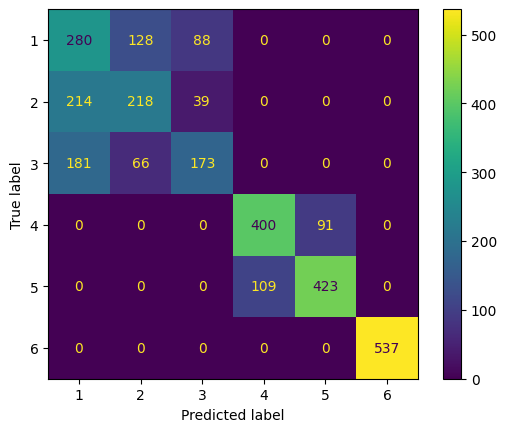

CPU times: user 389 ms, sys: 86.8 ms, total: 476 ms
Wall time: 387 ms


In [28]:
%%time

# Criar e ajustar um classificador de árvore de decisão com o melhor valor de ccp_alpha encontrado para o classificador 2
clf_2 = DecisionTreeClassifier(random_state=42,
                               ccp_alpha=melhor_ccp_2
                              ).fit(X_train, y_train)

# Imprimir os parâmetros do modelo do classificador 2
print(pd.DataFrame(data=clf_2.get_params(),
                   index=pd.Index(data=['Valor'],
                                  name='Parâmetro')
                  ).T,
      '\n')

# Imprimir a acurácia da árvore na base de testes para o classificador 2
print('Acurácia da árvore na base de testes:',
      clf_2.score(X=X_test, y=y_test))

# Visualizar a matriz de confusão para o classificador 2
ConfusionMatrixDisplay.from_estimator(estimator=clf_2,
                                      X=X_test,
                                      y=y_test)
plt.show()


### Insight:

O valor de ccp_alpha (0.002551) é relativamente baixo, indicando uma tendência a redução da complexidade da árvore de decisã. O modelo foi podado para evitar  overfitting e generalizar melhor para novos dados.

A acurácia da árvore de decisão na base de teste corresponde a 68,9% dos pontos de dados no conjunto de dados teste.


